## XOR illustration using Neural Network

In [1]:
# layer
class Layer:
    # this method is called when a new instance of the 'Layer' class is created.
    # it initializes two attributes: input and output
    def __init__(self):
        self.input = None
        self.output = None

    # forward method takes in the input and gives the output
    def forward(self, input):
        # TODO: return output
        pass
    # backward method takes in the derivative of the error w.r.t the output
    # which is called as output_gradient here
    # learning rate specifies the step size used for updating the layer's
    # parameters during optimization (gradient descent)
    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

In [2]:
# dense
# this code defines a class 'Dense' that represents a dense (fully connected)
# layer in a neural network.
import numpy as np
# from layer import Layer

class Dense(Layer):
    def __init__(self, input_size, output_size): # this method is called when a
# new instance of the 'Dense' class is created; input_size refers to the number
# of input neurons (features), while output_size represents the number of output
# neurons in the layer
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    # compute the backward pass of the Dense layer. it takes two arguments -
    # output_gradient and learning_rate
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        # update the weights and biases using gradient descent by subtracting the
        # product of the learning rate and the weights gradient from weights, and
        # similarly for the biases
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient # return the gradient of the input, which will be used
        # to propagate gradients backward to the preceding layer during backpropagation

# in summary, the 'Dense' class represents a fully connected layer in a neural network,
# with methods for forward and backward pass computations that compute the output and
# gradients, respectively. This class encapsulates the functionality required for the
# dense layer to process inputs and propagate gradients during training.

In [3]:
# activation
# define a class 'Activation' that represents an activation function layer in a
# neural network.
import numpy as np
# from layer import Layer

class Activation(Layer):
    # initialize a new instance with the activation function and its derivative
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        # return the output of the activation function
        return self.activation(self.input)

# compute the gradient of the error with respect to the input to the
# activation function layer
    def backward(self, output_gradient, learning_rate):
      # according to the chain rule of calculus, to compute the gradient of the error
      #  with respect to the input to the activation function layer, we need to multiply
      # the gradient of the error with respect to the output of the activation function
       # (i.e., output_gradient) by the derivative of the activation function with respect
       # to its input (i.e., self.activation_prime). This multiplication propagates the
       # error gradient backward through the activation function layer.
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [4]:
# activations
import numpy as np
# from layer import Layer
# from activation import Activation

class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2
      # super class initialization
      # call the constructor of the Activation superclass, passing the tanh
      # and tanh_prime functions as arguments.
        super().__init__(tanh, tanh_prime)
      # super() refers to the direct parent class (Activation) of the current
      # class (Tanh)
      # at line #16, we have the constructor of the parent class (Activation)
      # and we are passing in two arguments
      # when super().__init__(tanh, tanh_prime) is called, it executes the __init__
      # method defined in the Activation class (parent class). This allows the Tanh
      # class to inherit any functionalities or attributes that the Activation
      # class might provide for activation functions.

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_gradient, learning_rate):
        # This version is faster than the one presented in the video
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)
        # This code doesn't explicitly define a separate softmax_prime function because
        # the backward method directly calculates the necessary gradients during back-
        # propagation, optimizing performance for this specific layer.

        # it forms a specific matrix using an identity matrix and the layer's output
        # (self.output). It multiplies this matrix with the incoming gradient from
        # the subsequent layer (output_gradient). The result represents the gradients
        # to be propagated back to the previous layers for weight updates

In [5]:
# losses

import numpy as np

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [6]:
# network

def predict(network, input):
    output = input
    for layer in network:
      # call the forward method of each layer, passing the current o/p as i/p
      # update the output with the result of the layer's forward pass
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = False):
  # epochs, learning rate and verbose are the hyperparameters
  # verbose=True displays log information while False doesn't
    for e in range(epochs):
        error = 0 # initialize the error to 0
        for x, y in zip(x_train, y_train): # iterate through each input-target pair
            # forward pass - call predict to get the model's prediction for x
            output = predict(network, x)

            # calculate error
            error += loss(y, output)

            # backward pass (Backpropagation)
            grad = loss_prime(y, output) # gradient of the loss
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train) # average error for the epoch
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")

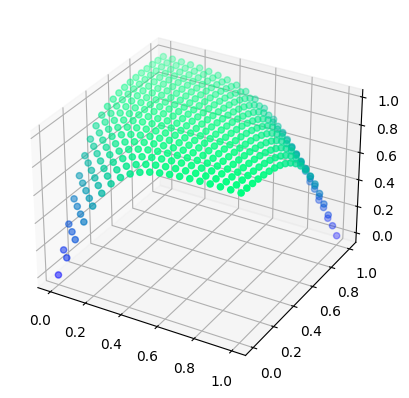

In [7]:
# xor

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# mpl_toolkits is a collection of toolkits that extend the functionality of
# Matplotlib. mplot3d is a specific toolkit within mpl_toolkits that provides
# 3D plotting capabilities. Axes3D is a class within mplot3d that enables
# you to create 3D plots in Matplotlib


# from dense import Dense
# from activations import Tanh
# from losses import mse, mse_prime
# from network import train, predict

X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Dense(2, 3), # an i/p layer with 2 i/p neurons -> 3 hidden neurons
    Tanh(), # apply tanh activation function to hidden layer's output
    Dense(3, 1), # a hidden layer with 3 i/p neurons (from the previous layer)
    # and 1 output neuron
    Tanh() # apply tanh activation to the final output
    # the use of tanh activations enables modeling the non-linear relationships,
    # crucial for capturing the XOR pattern
]

# train
# train the network using mean-squared error as the loss function, 1000 iterations
# and with gradietn descent with a learning rate of 0.1
train(network, mse, mse_prime, X, Y, epochs=1000, learning_rate=0.1)

# decision boundary plot
# create a grid of points covering the input space for visual analysis
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

# construct a 3D scatter plot
# color points based on their predicted output for visual representation of the
# decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()